# Scaling

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# Clases para estandarización 
from sklearn.preprocessing import StandardScaler
# El escalador - para escalamiento min-max 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
data = pd.read_csv('../../datasets/raw/fifa_players.csv')
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [3]:
data.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [15]:
scaler = MinMaxScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento y transformar tanto el entrenamiento como el conjunto de prueba
X_train['value_euro'] = scaler.fit_transform(X_train[['value_euro']])
X_test['value_euro'] = scaler.transform(X_test[['value_euro']])

# Verificar los resultados
print("Primeras filas de X_train con 'value_euro' normalizado:")
print(X_train[['value_euro']].head())

print("\nPrimeras filas de X_test con 'value_euro' normalizado:")
print(X_test[['value_euro']].head())

Primeras filas de X_train con 'value_euro' normalizado:
       value_euro
10404    0.006697
9679     0.005340
4777     0.000634
13825    0.014390
2395     0.006924

Primeras filas de X_test con 'value_euro' normalizado:
       value_euro
17074    0.076840
3184     0.000905
5339     0.000543
6665     0.002851
11053    0.007602


# se va a escalar la variable "Value_euro", que corresponde al valor en el mercado de cada jugador en euros. Esto porque es la que mas dista del min al max

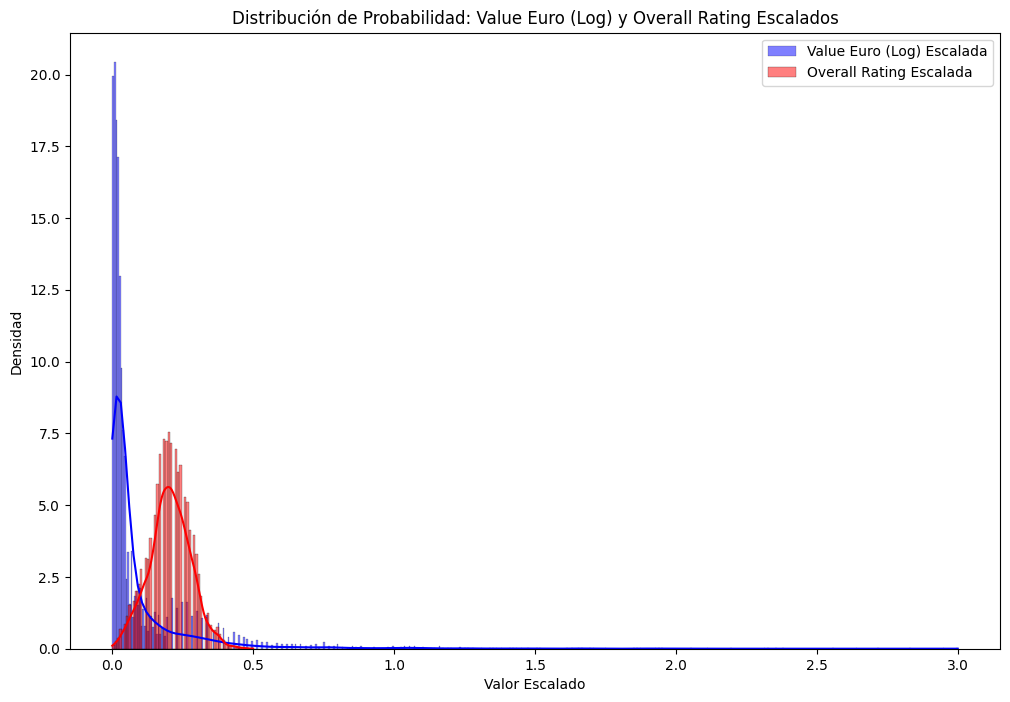

In [30]:
data_to_transform = X_train[['value_euro', 'overall_rating']].copy()

# Aplicar transformación logarítmica a 'value_euro'
# Agregar 1 para evitar problemas con valores 0 en logaritmo
data_to_transform['value_euro_log'] = np.log1p(data_to_transform['value_euro'])

# Inicializar el escalador para 'value_euro_log' con un rango [0, 3]
scaler_value_euro = MinMaxScaler(feature_range=(0, 3))

# Inicializar el escalador para 'overall_rating' con un rango [0, 0.5]
scaler_overall_rating = MinMaxScaler(feature_range=(0, 0.5))

# Ajustar y transformar las variables
scaled_value_euro_log = scaler_value_euro.fit_transform(data_to_transform[['value_euro_log']])
scaled_overall_rating = scaler_overall_rating.fit_transform(data_to_transform[['overall_rating']])

# Crear un DataFrame con los datos escalados
scaled_df = pd.DataFrame({
    'value_euro_log_escalada': scaled_value_euro_log.flatten(),
    'overall_rating_escalada': scaled_overall_rating.flatten()
})

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear las distribuciones
sns.histplot(scaled_df['value_euro_log_escalada'], kde=True, color="blue", label="Value Euro (Log) Escalada", stat="density")
sns.histplot(scaled_df['overall_rating_escalada'], kde=True, color="red", label="Overall Rating Escalada", stat="density")

# Añadir título y leyenda
plt.title('Distribución de Probabilidad: Value Euro (Log) y Overall Rating Escalados')
plt.legend()
plt.xlabel('Valor Escalado')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()